# Naive Bayesian Classification with Different Distributions

## Problem Statement

In this lab, we'll learn to choose the correct Naive Bayesian Classifier based on the distribution of our dataset, and how to use industry-standard tools such as `sklearn` to for Bayesian Classification.  

## Objectives

* Why we use naive Bayesian Classification, and why non-naive bayesian classification is impractical.
* How to select and correctly use `GaussianNB`, `BernoulliNB`, and `MultinomialNB` based on the distribution of the data. 
* Best practices for feature engineering when using using each flavor of Naive Bayesian Classifier.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

### Why is Bayesian Classification "Naive"?

In your own words, explain what "Naive" means in relation to "Naive Bayesian Classification".  What is the benefit of our classifier's Naive assumption?

Write your answer below this line:
________________________________________________________________________________________________________________________________
Bayesian Classifiers are "Naive" because they assume independence among predictor variables.  Although the independence assumption may potentially make our classifier less accurate in situations where predictor variables are highly correlated, it is often a necessary evil because the sheer number of conditional probabilities we would need to calculate for a non-naive bayesian approach grows at a crazy rate ($2^{n+1}$ for every binary feature added!)  For example, if our dataset had 3 binary-featured predictor columns, we would need to calculate 16 conditional probabilities.  Additionally, our dataset may not contain examples of every possible combination for each conditional probability, meaning that the requirements for the amount of data we need would also skyrocket.  By assuming independence, we reduce our computational cost down to simply computing the joint conditional probability of the factors, which is just the product of the conditional probability of each our target and each individual factor.  





### A Brief Introduction to Supervised Learning

This lab marks your first exposure to **_Supervised Learning_**--a class of machine learning algorithms that can "learn" how to correctly make predictions about data, as long as they have a dataset of examples to train on that contain the actual answers, or "labels", that go along with each observation.  

Specifically, we'll be using Naive Bayes for **_Classification_**, which allows us to predict the class of something.  The scikit-learn library (sklearn for short!) contains 3 different versions of Naive Bayesian Classifiers we can use to make predictions based on the distributions of the data it contains.  Before we can do that, however, we'll need to prepare our data by splitting it into training and testing sets, so that we can test how accurate our model is likely to be on real world data (since models sometimes have a problem with memorizing training data rather than actually "learning" what's needed to make predictions in the real world).

In the cell below, we're going to create a function that helps us split up our data and labels into training and testing sets.  This function should:

1. Take in two parameters:
    * `dataset`, a DataFrame containing all of our data
    * `labels_col_name`, a string that matches the column name of the column in `dataset` that our model will be learning to predict.  
2. Store the labels column in a separate variable, and then drop it from the `dataset` DataFrame. 
3. Call `train_test_split()`, passing in the dataset as the first parameter, and the variable containing the labels as the second parameter.  Return the results of this `train_test_split()` call.  

In [2]:
def split_data(dataset, labels_col_name):
    labels = dataset[labels_col_name]
    dataset.drop(labels_col_name, axis=1, inplace=True)
    
    return train_test_split(dataset, labels)

### Gaussian Naive Bayesian Classification

The `GaussianNB` classifier is best used when the data in the columns we'll use to make predictions is normally distributed.  `sklearn` provides a ready-to-use implementation of this classifier as in their `GaussianNB` object.  We're going to use the `GaussianNB` object to make classifications on the _Iris Dataset_.  

The _Iris Dataset_ is a classic dataset used for classification, created by the godfather of (frequentist) statistics, Ronald Fisher.  This dataset is one that is used so often for benchmarking and learning in data science that `sklearn` actually contains a helper function inside of the `sklearn.datasets` module to load the data and the labels. 

In the cell below:

1. Call `load_iris()` and store the results in the `iris` variable.
1. the `iris` variable has the data stored in it's `.data` attribute, and the labels stored in the `.target` attribute.  Call `train_test_split()` and pass in `iris.data` as the first parameter and `iris.target` as the second.  

In [3]:
# No need to use split_data function here, 
iris = load_iris()

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.data, iris.target)

Great! We have now split our data into training and testing sets.  We'll train our model on the data and labels from the training set, and then check the accuracy of our model using the data and labels from our testing set, to ensure that it actually does well on data that it hasn't seen before. 

Before we begin training our `GaussianNB` classifier, let's explore the Iris Dataset to check if the features are normally distributed or not. The data doesn't have to be perfectly normally distributed, but we'll want to see a general trend towards a bell curve in at least some of the features.  

In the cell below:
1. Create a DataFrame called `iris_df` out of the data contained in `iris_X_train`.  The names of each feature are stored in `iris.feature_names`, so be sure to pass that attribute in for the `columns` parameter.  
1.  Display the head of `iris_df` to ensure that everything loaded correctly. 

In [4]:
iris_df = pd.DataFrame(iris_X_train, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.8,4.0,1.2,0.2
1,5.0,2.3,3.3,1.0
2,5.3,3.7,1.5,0.2
3,6.7,3.1,5.6,2.4
4,5.7,4.4,1.5,0.4


Great! Now, in the cell below, loop through each column in the DataFrame and visualize the distribution of each feature.

**_HINT:_** Remember the handy [seaborn function](https://seaborn.pydata.org/generated/seaborn.distplot.html) we made use of in previous labs to easily visualize the distribution of a sample.  Also, remember to create a new `plt.plot()` and also call `plt.show()` on each separate iteration--otherwise, seaborn will plot each distribution on a single graph.  

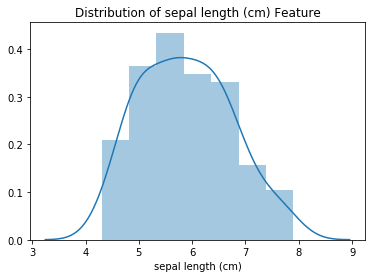

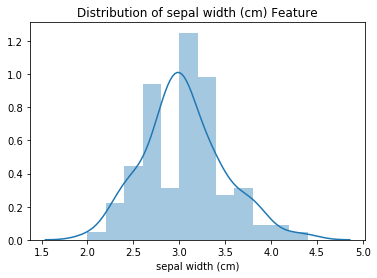

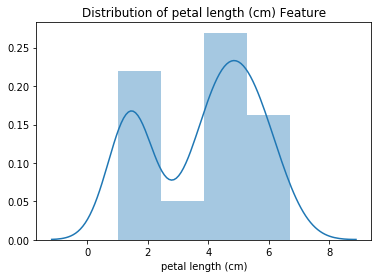

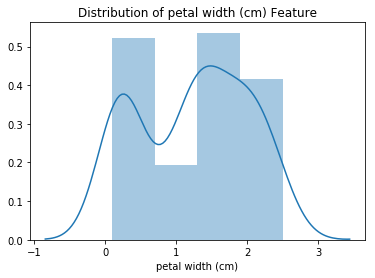

In [5]:
for col in iris.feature_names:
    plt.plot()
    sns.distplot(iris_df[col])
    plt.title("Distribution of {} Feature".format(col))
    plt.show()

Do any of the features seem normally distributed, or least close to normally distributed? 

Type your answer below this line:
________________________________________________________________________________________________________________________________
No feature is perfectly normally distributed, but data perfectly fitting any distribution in the real world is rare.  Sepal Length and Sepal Width both approximate a normal distribution in a very rough sense.  Sepal Length's 1-sigma region is too fat, and the tails are too short, but it's close.  Sepal Width has tails that are more in line with what we expect, but the overall distribution is highly kurtotic.  

The distribution and type of this data is a good fit for our `GaussianNB` classifier.  Let's fit a model!

In the cell below:

1.  Create a `GaussianNB` object.
1.  `fit()` the classifier to the iris training data. 
1.  Use the classifier to make predictions about the data in the iris test set (the data, not the labels) using the `.predict()` method.
1.  Use the `accuracy_score()` method from sklearn to check how accurate our `GaussianNB` object's predictions were for data it has not yet seen. 

In [6]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(iris_X_train, iris_y_train)
iris_predictions = gaussian_clf.predict(iris_X_test)
iris_testing_accuracy = accuracy_score(iris_y_test, iris_predictions)

print("Testing Accuracy for Iris Dataset with Gaussian Naive Bayesian Classifier: {:.4}%".format(iris_testing_accuracy * 100))

Testing Accuracy for Iris Dataset with Gaussian Naive Bayesian Classifier: 94.74%


Great! Our model was able to correctly predict which type of iris each flower was based on the data it was given with over 97% accuracy!

### Bernoulli Naive Bayesian Classification

The `BernoulliNB` classifier is best used when the predictors in the dataset are binary-featured, or can easily be binned as such.  This usually requires a bit of feature engineering on our part.  For instance, we can easily replace the `male` and `female` values within the Titanic dataset's `Sex` column with boolean values, or with 1 and 0.

### Feature Engineering for Bernoulli Classification

In order to make the titanic dataset work for a `BernoulliNB` classifier, we're going to need to do some feature engineering.  

In the cell below:

1. Read in the titanic dataset from `titanic.csv`
1. Change the data in the `Sex` column so that all `male` passengers are `0`, and all `female` passengers are `1`.
1. Create a new feature called `is_child`.  This feature should contain a `1` for all passengers under the age of `13`, and a `0` for everyone else. 
1. Create another column called `is_wealthy`.  All passengers with `Pclass==1` should have a `1` for this column, and all other passengers should have a `0`.
1. Store the `Survived` column in a variable called `titanic_labels`
1. Slice the DataFrame so that it contains only `Sex`, `is_child`, `is_wealthy`, `SibSp`, and `Parch`.
1. Use `train_test_split` to split our data into training and testing sets. Pass in sliced dataframe, as well as the `titanic_labels` variable.

In [7]:
df = pd.read_csv('titanic.csv')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['is_child'] = df['Age'] <= 13
df['is_wealthy'] = df['Pclass'] == 1
sliced_df = df[['Sex', 'is_child', 'is_wealthy', 'SibSp', 'Parch']]
titanic_labels = df['Survived']

bernoulli_X_train, bernoulli_X_test, bernoulli_y_train, bernoulli_y_test = train_test_split(sliced_df, titanic_labels)

Now that we have successfully prepared our data, let's create, fit, and make predictions with a `BernoulliNB` classifier!

In the cell below:

1. Create a `BernoulliNB()` object and store it in the appropriate variable.  
1.  Call our `BernoulliNB`'s `fit()` method on `X_train` and `y_train`.
1.  Use the fitted classifier to make predictions for the data stored in `X_test`.
1.  Use the `accuracy_score` method to check our classifier's testing accuracy by passing in the predictions for `X_test` as well as the true labels, which are stored in `y_test`.

In [8]:
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(bernoulli_X_train, bernoulli_y_train)
bernoulli_preds = bernoulli_clf.predict(bernoulli_X_test)
bernoulli_accuracy = accuracy_score(bernoulli_y_test, bernoulli_preds)
print("Accuracy on Testing Set from BernoulliNB Classifier: {:.4}%".format(bernoulli_accuracy * 100))

Accuracy on Testing Set from BernoulliNB Classifier: 82.96%


With only the gender of the passenger and some information about whether or not the passenger is wealthy and/or a child, our `BernoulliNB` classifier was able to predict passenger survival with ~76% accuracy!

### Multinomial Naive Bayesian Classification

The **_Multinomial Naive Bayesian Classifier_** is best used for when the predictors in our dataset contain (non-binary) categorical features.  Note that this classifier cannot handle negative values! If you dataset contains even one negative value in it, this classifier will throw an error.  For this classifier, we're going to use the titanic dataset, but without all the extra feature engineering.  

In the cell below:
 
1. Clean the `df` DataFrame so that it only contains the `Pclass`, `Survived`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, and `Embarked` classes.
1. Drop any rows containing null values. 
1. Store `Survived` in a separate variable and then remove it from the `df` dataset.
1. Map each string value in the `Embarked` column to an integer.  (`"S"`=`1`, `"C"`=2, `"Q"`=3)
1. Print out the number of `NaN`s in each column to ensure that we have eliminated them all.  

In [17]:
temp_df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'is_child', 'is_wealthy'], axis=1, inplace=False)
clean_df = temp_df.dropna()
print(clean_df.isna().sum())
multinomial_nb_labels = clean_df.Survived
clean_df.drop('Survived', axis=1, inplace=True)
clean_df['Embarked'] = clean_df['Embarked'].map({"S":1, "C":2, "Q":3})
clean_df.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\medio\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\medio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


Now, let's transform our `Age` data from integer values into categorical values.  In the cell below:

1. Complete the `bin_ages()` function.  This function should take in the `Age` column, and return a binned representation of this data.  The ages should be binned in 10 year increments. For example, a 7 year-old passenger should have a `binned_age` value of `0`, while a 42 year-old passenger should have a `Binned_Age` value of `4`.
1. Use the `bin_ages()` function to create a `Binned_Ages` column in `clean_df`, and then drop the `Age` column.  
1. Create training and testing sets using `clean_df` and `multinomial_labels`.

In [18]:
def bin_ages(age_column):
    binned_ages = []
    for i in age_column:
        age_group = i // 10
        binned_ages.append(int(age_group))
    
    return binned_ages


clean_df['Binned_Ages'] = bin_ages(clean_df['Age'])
clean_df.head()

mnb_X_train, mnb_X_test, mnb_y_train, mnb_y_test = train_test_split(clean_df, multinomial_nb_labels)

C:\Users\medio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In the cell below:

1. Create a `MultinomialNB` object.
1. `fit()` the classifier using the appropriate training data and labels.
1. `predict()` the outcome of the passengers in `mnb_X_test`.
1. Use `accuracy_score()` with our predictions and the ground-truth labels in `mnb_y_test` to determine our classifier's accuracy.

In [21]:
mnb_clf = MultinomialNB()
mnb_clf.fit(mnb_X_train, mnb_y_train)
mnb_preds = mnb_clf.predict(mnb_X_test)
mnb_testing_accuracy = accuracy_score(mnb_y_test, mnb_preds)

print("Testing Accuracy for Titanic Dataset with Multinomial Naive Bayesian Classifier: {:.4}%".format(mnb_testing_accuracy * 100))

Testing Accuracy for Titanic Dataset with Multinomial Naive Bayesian Classifier: 70.22%


### Conclusion

In this lab, we learned:

* Why we use naive Bayesian Classification, and why non-naive bayesian classification is impractical.
* How to select and correctly use `GaussianNB`, `BernoulliNB`, and `MultinomialNB` based on the distribution of the data. 
* Best practices for feature engineering when using using each flavor of Naive Bayesian Classifier.  